In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import cvxpy as cvx
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = loadmat('LM01Data.mat')

In [3]:
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

In [4]:
t

array([0.        , 0.0001005 , 0.00020101, 0.00030151, 0.00040201,
       0.00050251, 0.00060302, 0.00070352, 0.00080402, 0.00090452,
       0.00100503, 0.00110553, 0.00120603, 0.00130653, 0.00140704,
       0.00150754, 0.00160804, 0.00170854, 0.00180905, 0.00190955,
       0.00201005, 0.00211055, 0.00221106, 0.00231156, 0.00241206,
       0.00251256, 0.00261307, 0.00271357, 0.00281407, 0.00291457,
       0.00301508, 0.00311558, 0.00321608, 0.00331658, 0.00341709,
       0.00351759, 0.00361809, 0.00371859, 0.0038191 , 0.0039196 ,
       0.0040201 , 0.0041206 , 0.00422111, 0.00432161, 0.00442211,
       0.00452261, 0.00462312, 0.00472362, 0.00482412, 0.00492462,
       0.00502513, 0.00512563, 0.00522613, 0.00532663, 0.00542714,
       0.00552764, 0.00562814, 0.00572864, 0.00582915, 0.00592965,
       0.00603015, 0.00613065, 0.00623116, 0.00633166, 0.00643216,
       0.00653266, 0.00663317, 0.00673367, 0.00683417, 0.00693467,
       0.00703518, 0.00713568, 0.00723618, 0.00733668, 0.00743

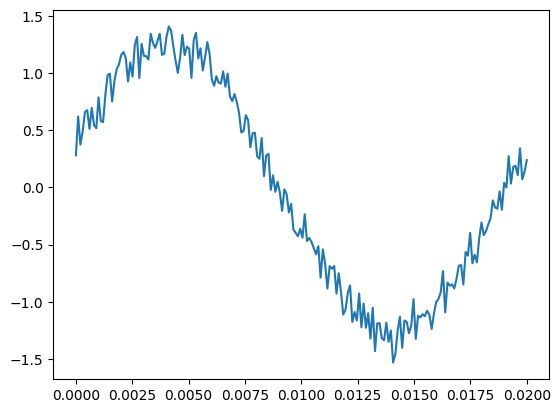

In [5]:
plt.plot(t,y)

In [6]:
A = np.ones(n_points)
omega = np.ones(n_points)
phi = np.ones(n_points)
f = []

for t_, A_, omega_, phi_, y_ in zip(t, A, omega, phi, y):
    f.append(A_ * np.sin(omega_ * t_ + phi_) - y_)

f = np.array(f)

In [44]:
D = np.zeros((n_points, 3))


def f_func(A_, omega_, phi_, t_=t, y_=y):
    return A_ * np.sin(omega_ * t_ + phi_) - y_

def phi_func(A_, omega_, phi_, t_=t):
    return A_ * np.sin(omega_ * t_ + phi_)

def get_Df(A_, omega_, phi_, t_=t):
    return np.array([np.sin(omega_ * t_ + phi_), A_ * t_ * np.cos(omega_ * t_ + phi_), A_ * np.cos(omega_ * t_ + phi_)]).transpose()


In [154]:
lambda_ = 1
k = 0
k_max = 35
x = np.array([1, 100 * np.pi, 0])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(3)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

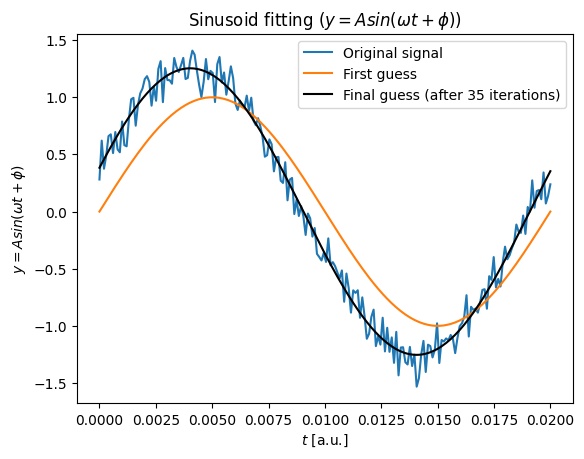

In [159]:
plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(1, 100 * np.pi, 0), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($y = Asin(\omega t + \phi)$)")
plt.xlabel("$t$ [a.u.]")
plt.ylabel("$y = Asin(\omega t + \phi)$")
plt.legend()
plt.show()


Text(0.5, 0, 'iteration number')

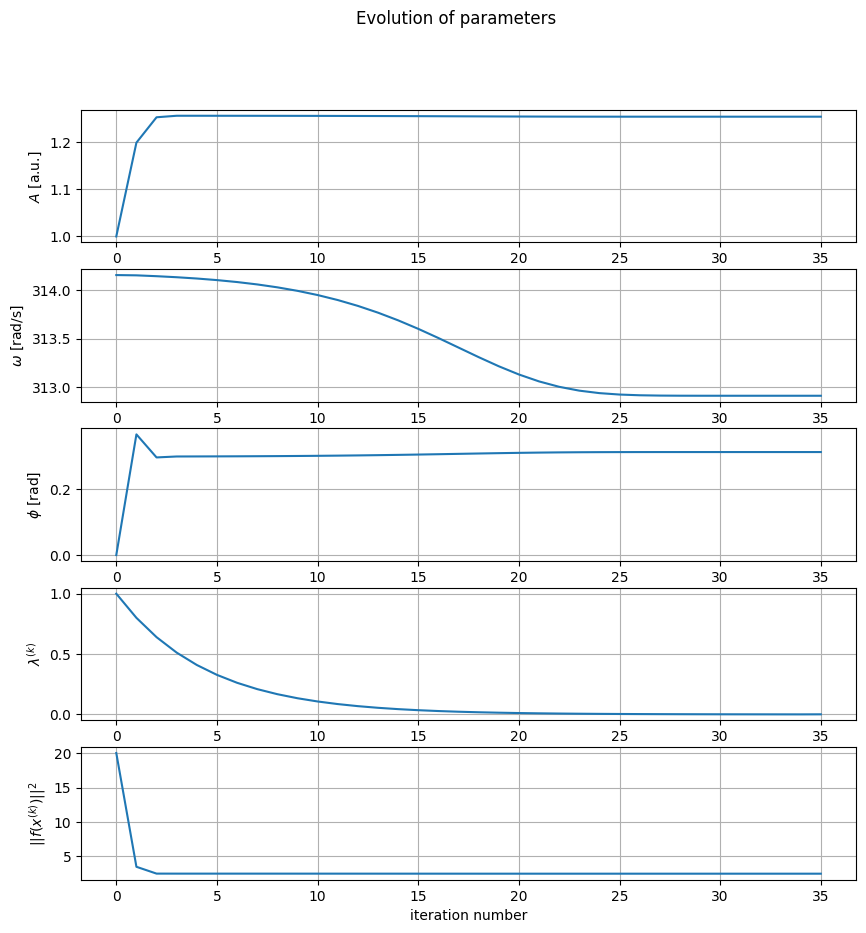

In [158]:
fig, ax = plt.subplots(5, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 1)")

ax[0].set_ylabel("$A$ [a.u.]")
ax[1].set_ylabel("$\omega$ [rad/s]")

ax[2].set_ylabel("$\phi$ [rad]")

for i in range(3):
    ax[i].grid()
    ax[i].plot(x_backtrack[:, i])
    
ax[3].grid()
ax[3].plot(lambda_backtrack)
ax[3].set_ylabel("$\lambda^{(k)}$")

ax[4].grid()
ax[4].plot(norm_backtrack)
ax[4].set_ylabel("$||f(x^{(k)})||^2$")
ax[4].set_xlabel("iteration number")

In [164]:
# Zadanie 2
data = loadmat('LM04Data.mat')
t = data['t'].flatten()
y = data['y'].flatten()
n_points = len(y)

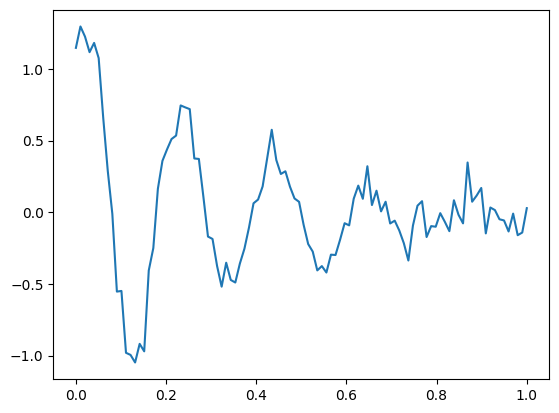

In [165]:
plt.plot(t, y)

In [169]:
D = np.zeros((n_points, 3))


def f_func(A_, a_, omega_, phi_, t_=t, y_=y):
    return A_ * np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_) - y_

def phi_func(A_, a_, omega_, phi_, t_=t):
    return A_ * np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_)

def get_Df(A_, a_, omega_, phi_, t_=t):
    return np.array([
            np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_),
            - t_ * A_ * np.exp(-a_ * t_) * np.sin(omega_ * t_ + phi_),
            t_ * A_ * np.exp(-a_ * t_) * np.cos(omega_ * t_ + phi_),
            A_ * np.exp(-a_ * t_) * np.cos(omega_ * t_ + phi_)
        ]).transpose()


In [202]:
lambda_ = 1
k = 0
k_max = 15
x = x_first = np.array([1, 1, 5 * np.pi, 1])

x_backtrack = [x]
lambda_backtrack = [lambda_]
norm_backtrack = [np.linalg.norm(f_func(*x), ord=2) ** 2]

for _ in range(k_max):
    J = get_Df(*x)
    x_new = x - np.linalg.inv(J.transpose() @ J + lambda_ * np.identity(4)) @ J.transpose() @ f_func(*x)
    if np.linalg.norm(f_func(*x_new), ord=2) < np.linalg.norm(f_func(*x), ord=2):
        lambda_ *= 0.8
        x = x_new
    else:
        lambda_ *= 2

    
    x_backtrack.append(x)
    lambda_backtrack.append(lambda_)
    norm_backtrack.append(np.linalg.norm(f_func(*x), ord=2) ** 2)

x_backtrack = np.array(x_backtrack)
lambda_backtrack = np.array(lambda_backtrack)
norm_backtrack = np.array(norm_backtrack)

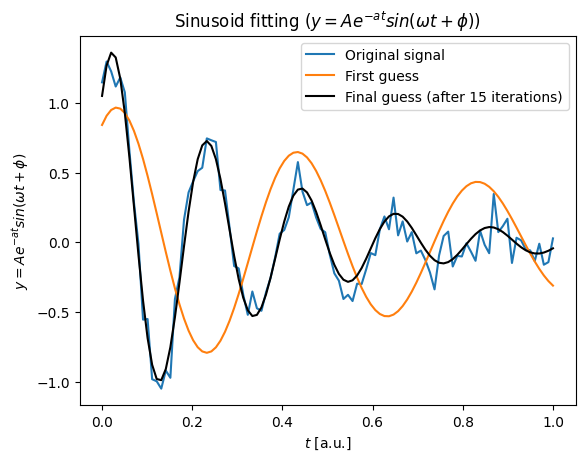

In [203]:
plt.plot(t, y, label='Original signal')
plt.plot(t, phi_func(*x_first), label='First guess')
plt.plot(t, phi_func(*x), c='k', label=f'Final guess (after {k_max} iterations)')


plt.title("Sinusoid fitting ($y = Ae^{-at}sin(\omega t + \phi)$)")
plt.xlabel("$t$ [a.u.]")
plt.ylabel("$y = Ae^{-at}sin(\omega t + \phi)$")
plt.legend()
plt.show()

In [204]:
x

array([ 1.46471628,  3.00262365, 29.99208109,  0.79864267])

Text(0.5, 0, 'iteration number')

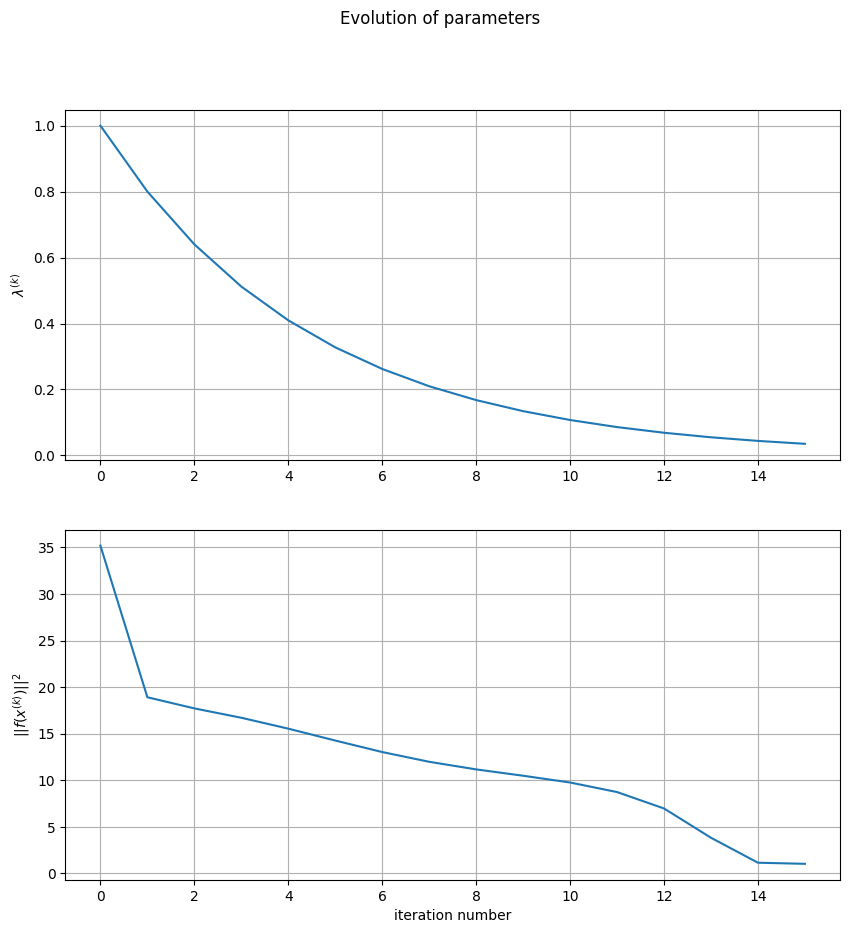

In [205]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
fig.suptitle("Evolution of parameters (zadanie 2)")
ax[0].grid()
ax[0].plot(lambda_backtrack)
ax[0].set_ylabel("$\lambda^{(k)}$")

ax[1].grid()
ax[1].plot(norm_backtrack)
ax[1].set_ylabel("$||f(x^{(k)})||^2$")
ax[1].set_xlabel("iteration number")